In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors


In [2]:
# Define sigmoid function

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))



In [3]:
# Sigmoid over set of values

values = [-3, -2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5, 3]
print([sigmoid(value) for value in values])

[0.04742587317756678, 0.07585818002124355, 0.11920292202211755, 0.18242552380635635, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8175744761936437, 0.8807970779778823, 0.9241418199787566, 0.9525741268224334]


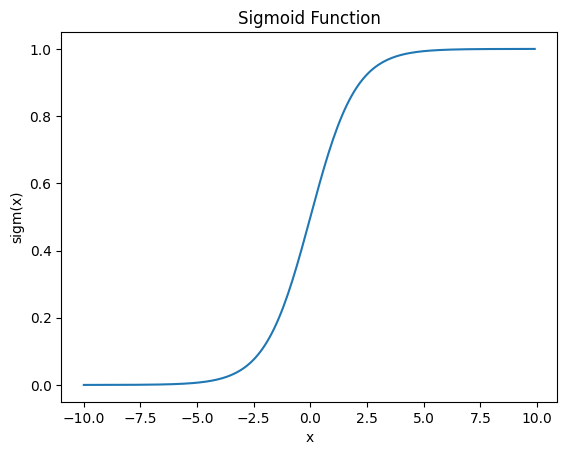

In [4]:
# Plot sigmoid function -10 to 10 with matplotlib
values = np.arange(-10, 10, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('x')
plt.ylabel('sigm(x)')
plt.title('Sigmoid Function')
plt.show()

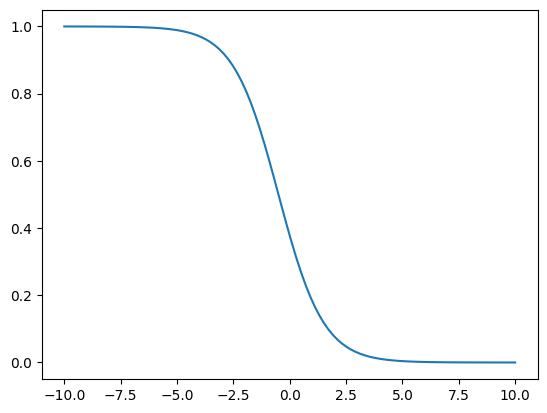

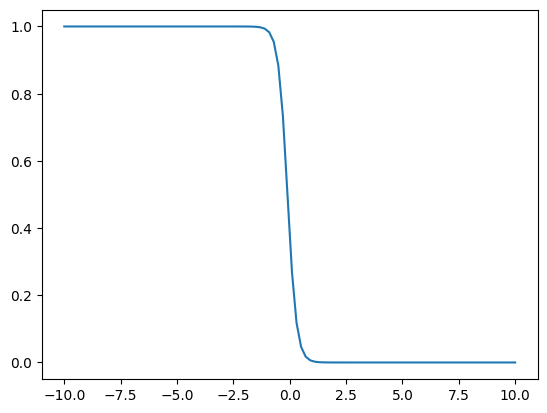

In [5]:
# Define sigmoid with weight and bias.

def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

sigmoid(1, 0.5, 0)

w = -1
b = -0.5
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

# Observe how changing the weight affects the curve slope (gradient)
w = -5
b = -0.5
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()



SHAPE :  (100,) (100,) (100, 100) (100, 100)


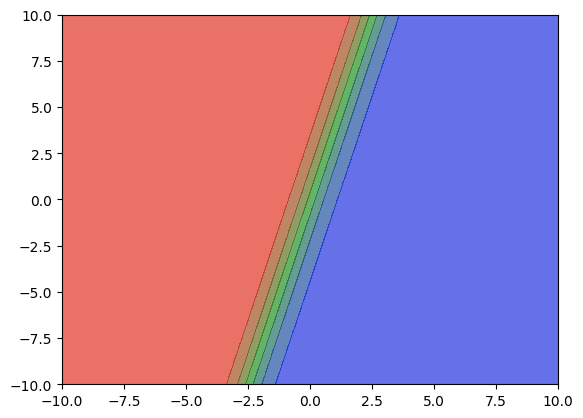

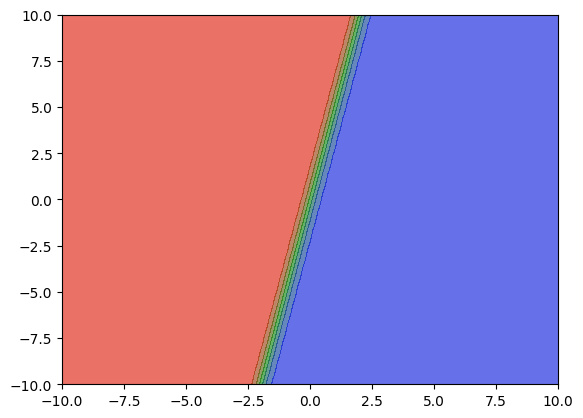

In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

sigmoid_2d(1, 0, 0.5, 0, 0)

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print("SHAPE : ", X1.shape, X2.shape, XX1.shape, XX2.shape)

w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])

plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()


# Observe changes.

w1 = 5
w2 = -1
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])

plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

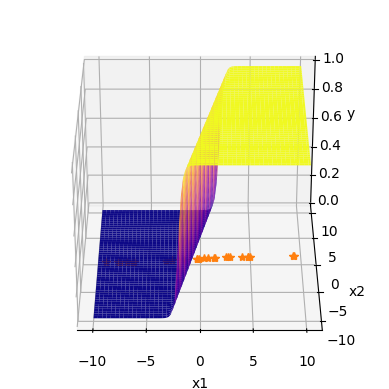

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='plasma')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 270)

# Compute Loss for a Given Dataset

w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

plt.plot(X, Y, '*')
plt.show()


In [8]:

# Function to calculate loss
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

63 25
0.5 0.26


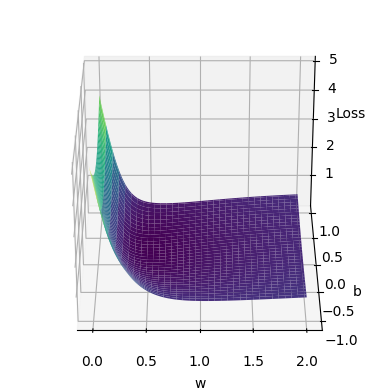

In [9]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

WW.shape

for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

print(i, j)

print(WW[i, j], BB[i, j])


In [10]:
# Class for Sigmoid Neuron

class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):

    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

In [11]:
# Fit for toy data - Points and their classes are given
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5], [4, 3], [-1, -4], [2, 2], [-2, 3]])
Y = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0]

sn = SigmoidNeuron()
sn.fit(X, Y, 5, 0.25, True)


In [12]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap='plasma', alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap='plasma')
  ax.plot()

[[-0.22513564 -0.5478837 ]] [0.0048369]
[[ 0.75191024 -0.20371542]] [0.07445533]
[[ 0.96731738 -0.035912  ]] [-0.04625721]
[[ 1.00729552 -0.33872925]] [-0.12839243]
[[ 1.19557681 -0.03682021]] [-0.22548523]
[[ 1.18915725 -0.40157407]] [-0.29246818]
[[ 1.35019694 -0.10088913]] [-0.37416597]
[[ 1.33080276 -0.43893342]] [-0.44407234]
[[ 1.46854634 -0.16433626]] [-0.5123743]
[[ 1.44973263 -0.45178284]] [-0.57940868]
[[ 1.56125647 -0.22835669]] [-0.63617684]
[[ 1.552414  -0.4405461]] [-0.69521215]
[[ 1.63450819 -0.29063136]] [-0.74221566]
[[ 1.64049099 -0.41806246]] [-0.79115809]
[[ 1.69644029 -0.34289321]] [-0.83101012]
[[ 1.71531305 -0.40270196]] [-0.87136687]
[[ 1.75426819 -0.37851451]] [-0.90657639]
[[ 1.77970884 -0.401542  ]] [-0.94100566]
[[ 1.81034648 -0.39982597]] [-0.97270087]
[[ 1.8370017  -0.40939485]] [-1.00305338]
[[ 1.86396191 -0.41386284]] [-1.03168813]
[[ 1.88954836 -0.41998982]] [-1.05898315]
[[ 1.91445474 -0.42528845]] [-1.08497614]
[[ 1.93851508 -0.43059875]] [-1.10980693

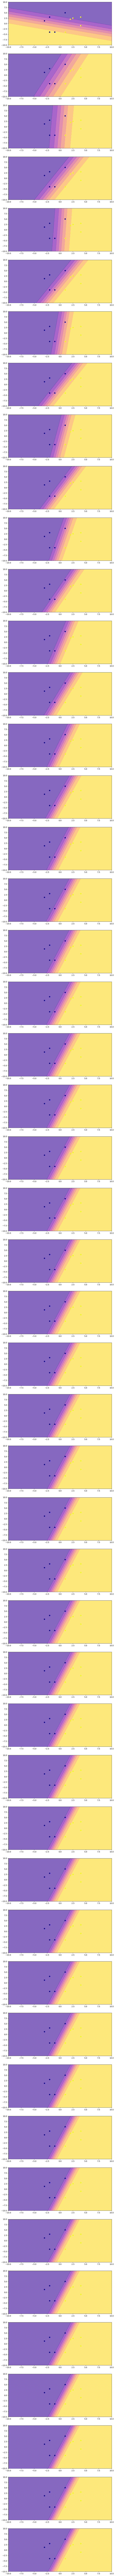

In [13]:
sn.fit(X, Y, 1, 0.05, True)

# Number of epoch
N = 50
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Sigmoid Neuron Class for Actual Data and View Results

In [14]:
#import dataset
df = pd.read_csv('riceClassification.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [16]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


<Axes: xlabel='Class', ylabel='count'>

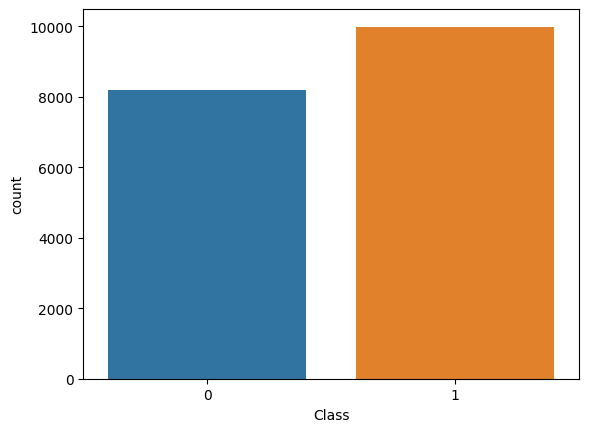

In [17]:
import seaborn as sns

# Assuming df is your DataFrame
sns.countplot(data=df, x='Class')



In [18]:
x = df[["id","Area","MajorAxisLength","MinorAxisLength"]]
y = df["Class"]
print("x shape is",x.shape)
print("y shape is",y.shape)

x shape is (18185, 4)
y shape is (18185,)


In [19]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your feature and target variables, respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=5)


In [20]:
print("x_train shape is",x_train.shape)
print("x_test shape is",x_test.shape)
print("y_train shape is",y_train.shape)
print("y_train shape is",y_test.shape)

x_train shape is (12729, 4)
x_test shape is (5456, 4)
y_train shape is (12729,)
y_train shape is (5456,)


In [21]:
display(x_train.dtypes)

id                   int64
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
dtype: object

In [22]:
display(y_train.dtypes)

dtype('int64')

In [23]:
class SigmoidNeuron__:
    def __init__(self, learning_rate=0.01, epochs = 1000):
        self.b = None   #bias
        self.W = None
        self.lr = learning_rate
        self.iters = epochs
        self.errorPerItr = None

    def sigmoid_func(self,power):
        return 1.0/(1.0 + np.exp(-power))

    def predict(self, X):
        y_pred = []
        for index in range(len(X)):
            x=X.iloc[index]
            linear_output = np.dot(x, self.W.T) + self.b  #we got the exponent
            y_predicted = self.sigmoid_func(linear_output)
            y_pred.append(y_predicted)
        return y_pred


    #sigmoid neuron needs a principled learning algorithm for learning the values of W and B
    def fit(self, X, Y):
        self.b = 0
        n_features = X.shape[1]
        self.W = np.zeros(n_features)

        #ensure that y is 0 or 1
        y_ = np.array([1 if i>0 else 0 for i in Y])

        self.errorPerItr = []

        for itr in range(self.iters):
            grad_w = 0
            grad_b = 0
            loss = 0
            for index in range(len(X)):
                x=X.iloc[index]
                linear_output = np.dot(x, self.W) + self.b
                y_predicted = self.sigmoid_func(linear_output)
                fx = y_predicted

                y= Y.iloc[index]
                grad_w += (fx - y)*fx*(1-fx)*np.dot(np.ones(n_features), x)
                grad_b += (fx - y)*fx*(1-fx)

                #for each epoch we will calculate the loss
                loss += (fx - y)**2
            self.errorPerItr.append(0.5 * loss)
            #print("L: ", 0.5 * loss)

            #calculate new W and b
            for i in range(n_features): # since W is a vector
                self.W[i] -= self.lr*grad_w
            self.b -= self.lr*grad_b    # b is a scalar
            #print("w: ", self.W)
            #print("B: ", self.b)


In [24]:
sn_Model = SigmoidNeuron__(learning_rate = 0.01, epochs=20)
sn_Model.fit(x_train,y_train)

<ipython-input-23-4abaab82d823>:10: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-power))


In [25]:
prediction = sn_Model.predict(x_test)

<ipython-input-23-4abaab82d823>:10: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-power))


In [26]:
from sklearn.metrics import accuracy_score

# Assuming y_test and prediction are defined properly
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)


Accuracy:  0.45216275659824046
